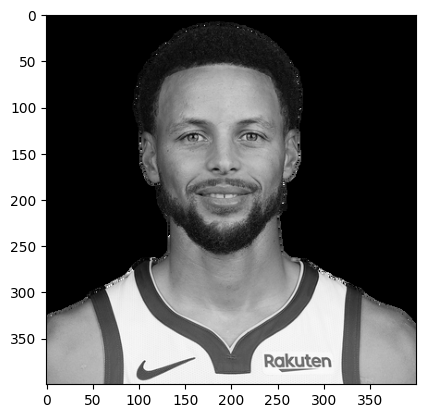

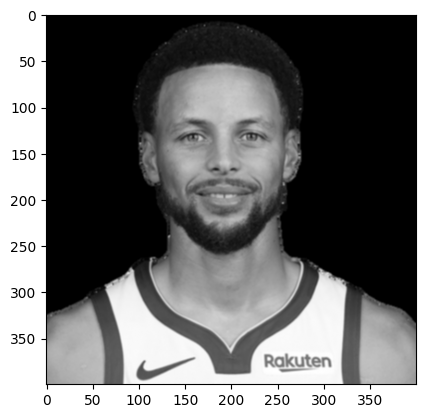

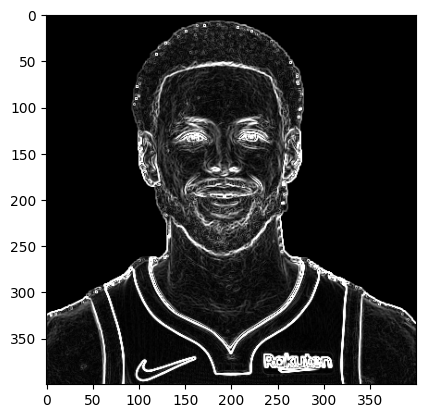

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("steph.png", 0).astype(np.float32)
gaussian_blur = np.array([[1,2,1], [2,4,2], [1,2,1]]) / 16

sobel_x_filter = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel_y_filter = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

padded_img = np.pad(img, ((1, 1), (1, 1)), mode='edge')
out = np.zeros_like(img)
out_sobel_x = np.zeros_like(img)
out_sobel_y = np.zeros_like(img)
sobel = np.zeros_like(img)
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    out[i, j] = np.sum(padded_img[i: i+gaussian_blur.shape[0], j: j+gaussian_blur.shape[1]] * gaussian_blur)
    out_sobel_x[i, j] = np.sum(padded_img[i: i+sobel_x_filter.shape[0], j: j+sobel_x_filter.shape[1]] * sobel_x_filter)
    out_sobel_y[i, j] = np.sum(padded_img[i: i+sobel_y_filter.shape[0], j: j+sobel_y_filter.shape[1]] * sobel_y_filter)
    sobel[i, j] = np.sqrt(out_sobel_x[i, j]**2 + out_sobel_y[i, j]**2)

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(out, cmap='gray')
plt.show()
plt.imshow(np.clip(sobel, 0, 255).astype(np.uint8), cmap='gray')
plt.show()

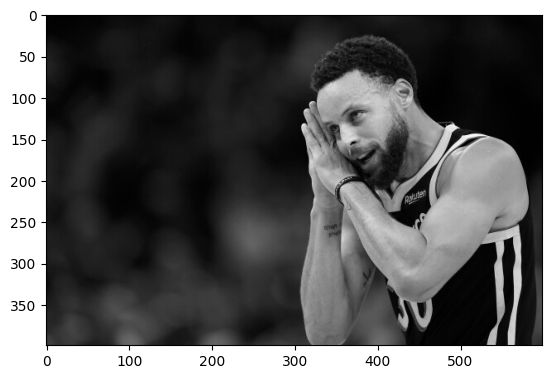

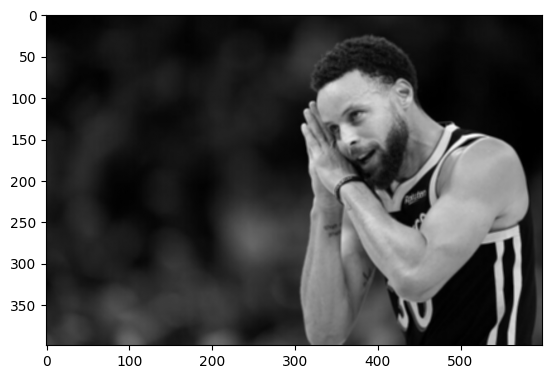

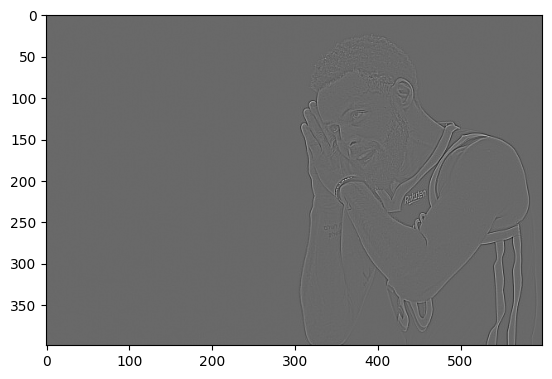

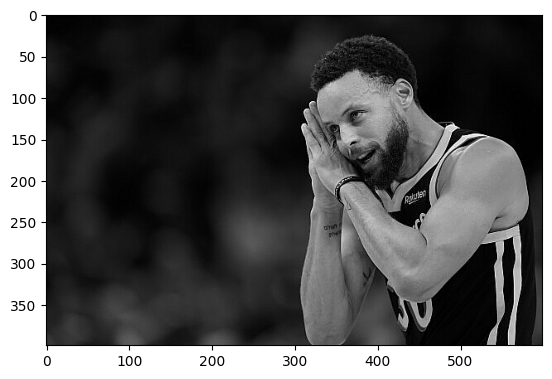

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("steph2.jpeg", 0).astype(np.float32)
box_blur = np.ones((3, 3), dtype=np.float32) / 9
blurred = cv2.filter2D(img, -1, box_blur)
features = img - blurred
sharpened = np.clip(img + 1.5 * features, 0, 255).astype(np.uint8)

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(blurred, cmap='gray')
plt.show()
plt.imshow(features, cmap='gray')
plt.show()
plt.imshow(sharpened, cmap='gray')
plt.show()

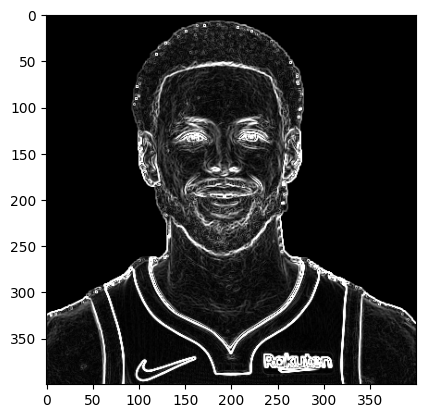

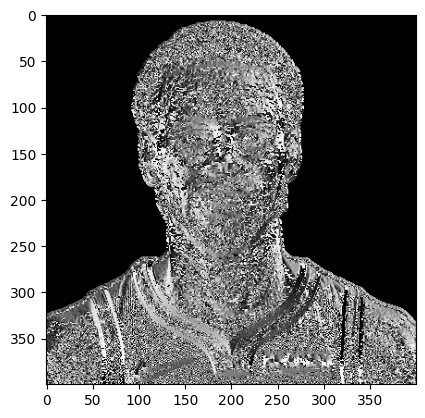

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convolve(img, kernel):
  padded_image = np.pad(img, ((1,1), (1,1)), mode='edge')
  output = np.zeros_like(img)
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          output[i,j] = np.sum(padded_image[i: i+kernel.shape[0], j:j+kernel.shape[1]] * kernel)
  return output

img = cv2.imread("steph.png", 0).astype(np.float32)
gaussian_blur = np.array([[1,2,1], [2,4,2], [1,2,1]]) / 16
blurred = convolve(img, gaussian_blur)
# blurred = convolve(convolve(img, gaussian_blur), gaussian_blur)

sobel_x_filter = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel_y_filter = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
sobel_x = convolve(img, sobel_x_filter)
sobel_y = convolve(img, sobel_y_filter)
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
theta = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)
theta[theta < 0] += 180

plt.imshow(np.clip(sobel_mag, 0, 255).astype(np.uint8), cmap='gray')
plt.show()
plt.imshow(np.clip(theta, 0, 255).astype(np.uint8), cmap='gray')
plt.show()